In [88]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import warnings
warnings.filterwarnings('ignore')

In [89]:
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\User\Desktop\Project_322


In [90]:
train_path = "train"
validation_path = "validation"
test_path = "test"

image_categories = os.listdir('C:/Users/User/Desktop/Project_322/train')

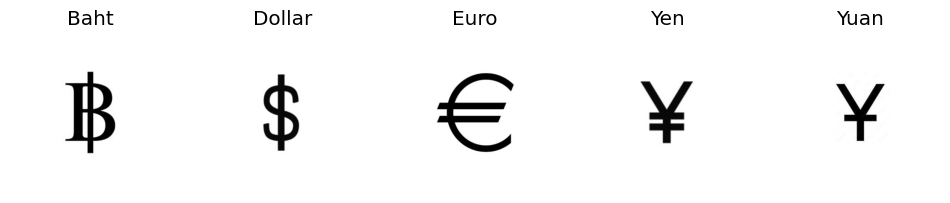

In [91]:
def plot_images(image_categories):
    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):
        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img) / 255.0

        # Create Subplot and plot the images
        plt.subplot(4, 5, i + 1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')

    plt.show()

# Call the function
plot_images(image_categories)

In [92]:
# Creating Image Data Generator for train, validation, and test set

# 1. Train Set
train_gen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize the data
train_image_generator = train_gen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,)
# 2. Validation Set
val_gen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize the data
val_image_generator = train_gen.flow_from_directory(
    validation_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# 3. Test Set
test_gen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize the data
test_image_generator = train_gen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

Found 400 images belonging to 5 classes.
Found 400 images belonging to 5 classes.
Found 400 images belonging to 5 classes.


In [93]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'Baht', 1: 'Dollar', 2: 'Euro', 3: 'Yen', 4: 'Yuan'}


In [94]:
# Build a custom sequential CNN model
model = Sequential()

# Add Layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))    # Output_channel = 5

# Print the model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 107, 107, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 53, 53, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 89888)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │     2,876,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,914,469 (11.12 MB)

 Trainable params: 2,914,469 (11.12 MB)

 Non-trainable params: 0 (0.00 B)

In [95]:
# Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [96]:
# Print the model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 107, 107, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 53, 53, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 89888)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │     2,876,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,914,469 (11.12 MB)

 Trainable params: 2,914,469 (11.12 MB)

 Non-trainable params: 0 (0.00 B)

In [97]:
# Train the model using your data (train_image_generator and val_image_generator)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
hist = model.fit(train_image_generator,
                 epochs=100,
                 verbose=1,
                 validation_data=val_image_generator,
                 steps_per_epoch=3750//32,
                 validation_steps=750//32,
                 callbacks=early_stopping)

Epoch 1/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.2204 - loss: 1.5679 - val_accuracy: 0.2500 - val_loss: 1.5428
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.2227 - loss: 1.5546 - val_accuracy: 0.2500 - val_loss: 1.5433
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.2277 - loss: 1.5449 - val_accuracy: 0.3200 - val_loss: 1.5458
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.2633 - loss: 1.5431 - val_accuracy: 0.3175 - val_loss: 1.5398
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.2739 - loss: 1.5358 - val_accuracy: 0.2500 - val_loss: 1.5438
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.2406 - loss: 1.5454 - val_accuracy: 0.2550 - val_loss: 1.5340
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.3002 - loss: 1.5408 - val_accuracy: 0.3275 - val_loss: 1.5299
Epoch 8/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.2864 - loss: 1.5367 -

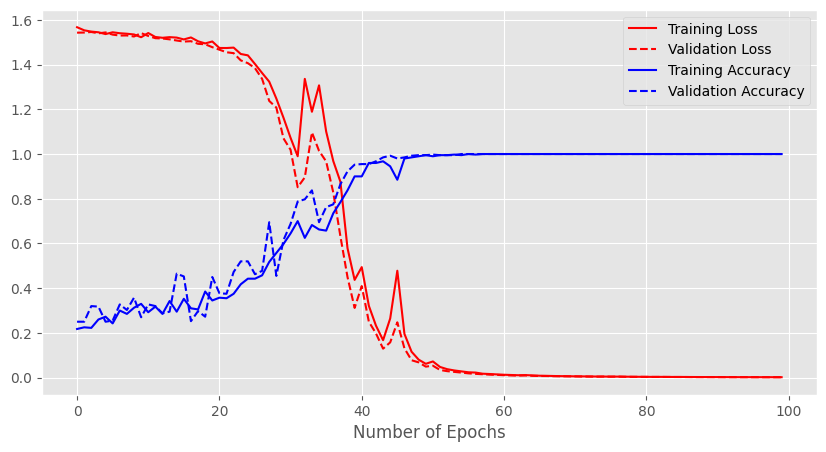

In [104]:
# Plot the error and accuracy
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [105]:
# Predict the accuracy for the test set
model.evaluate(test_image_generator)

model_loss = (model.evaluate(val_image_generator)[0])
model_Accuracy = (model.evaluate(val_image_generator)[1]*100)

print(f"Loss of this model --> {model_loss}")
print(f"Accuracy of this model --> {model_Accuracy}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 1.0000 - loss: 0.0015
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 1.0000 - loss: 0.0015
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 1.0000 - loss: 0.0015
Loss of this model --> 0.0017922093393281102
Accuracy of this model --> 100.0%


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step


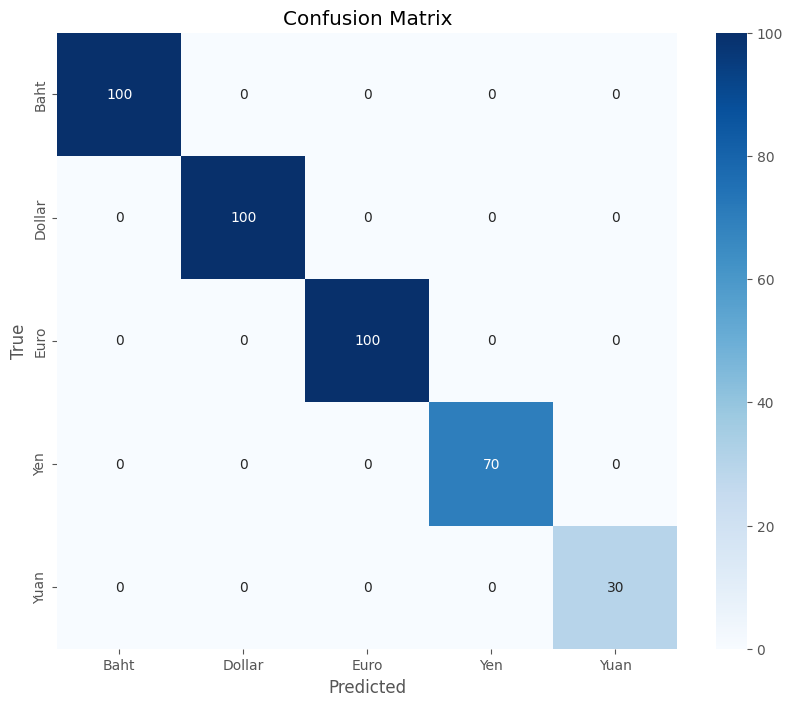

In [106]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate predictions for the validation data
y_pred = model.predict(val_image_generator)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(val_image_generator.classes[val_image_generator.index_array], y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_map.values(), yticklabels=class_map.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


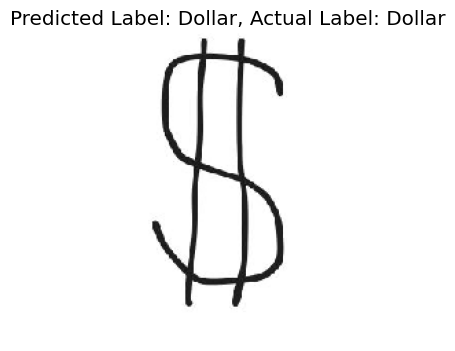

In [115]:
# Testing the Model
test_image_path = '3.jpg'
def generate_predictions(test_image_path, actual_label):
    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(224, 224))
    test_img_arr = image.img_to_array(test_img) / 255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()


# call the function
generate_predictions(test_image_path, actual_label='Dollar')

In [116]:
from tensorflow.keras.models import save_model

# Save the model to .h5 file
model.save("model.h5")


In [117]:
from tensorflow.keras.models import load_model

# Load the model from .h5 file
model = load_model("model.h5")  # Adjust the filename accordingly

# Convert the model to JSON format
model_json = model.to_json()

# Save the JSON representation to a file
with open("model.json", "w") as json_file:
    json_file.write(model_json)
